In [ ]:
import pandas as pd

# Import the Excel file into a DataFrame
df = pd.read_excel('Temp.xlsx')

# Display the DataFrame to verify the import
print(df)


          City  Apr  Feb  Jan  Jun  Mar  May
0       London    9    1    0    5    2   17
1  Los Angeles   27   25   24   29   26   18
2     New York   21   19   18   23   20   22
3        Paris    9    7    6   11    8   10


In [ ]:
average_temperatures = df.mean()
print("Average Temperatures:")
print(average_temperatures)


Average Temperatures:
Apr        16.500
Feb        13.000
Jan        12.000
Jun        17.000
Mar        14.000
May        16.750
Average    14.875
Maximum    20.000
dtype: float64


<ipython-input-26-7044a6daec91>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_temperatures = df.mean()


In [ ]:
max_temperatures = df.max()
print("Maximum Temperatures:")
print(max_temperatures)



Maximum Temperatures:
City    Paris
Apr        27
Feb        25
Jan        24
Jun        29
Mar        26
May        22
dtype: object


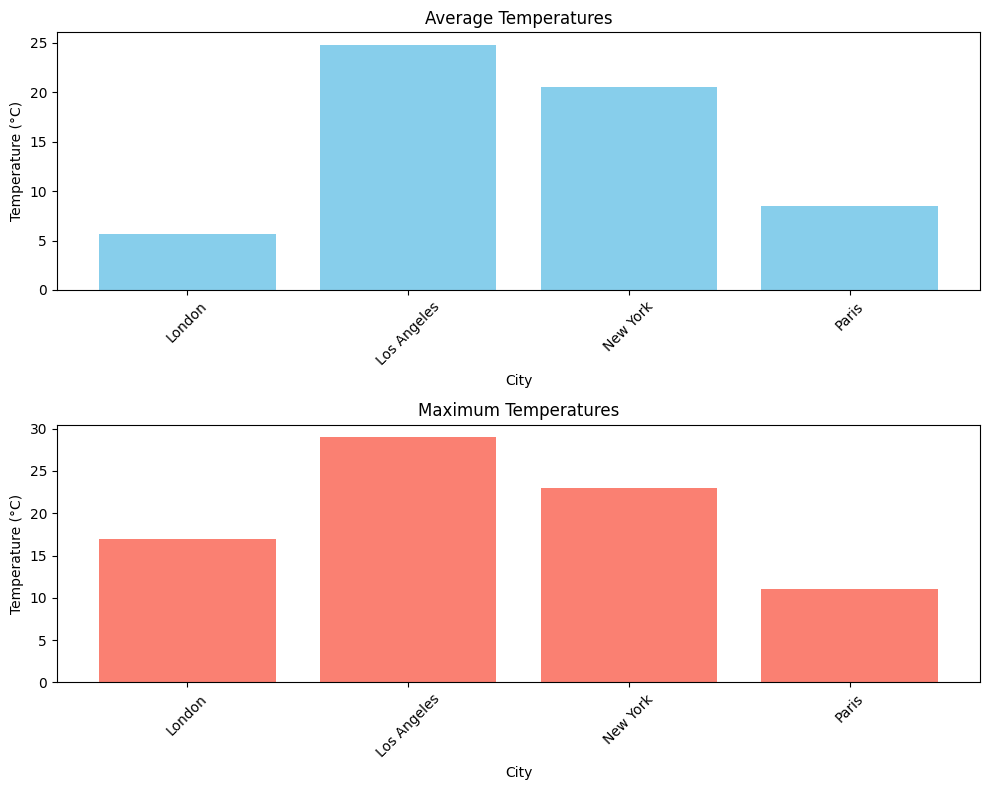

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate average and maximum temperatures
df['Average'] = df[['Apr', 'Feb', 'Jan', 'Jun', 'Mar', 'May']].mean(axis=1)
df['Maximum'] = df[['Apr', 'Feb', 'Jan', 'Jun', 'Mar', 'May']].max(axis=1)

# Create a figure and two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot average temperatures
axs[0].bar(df['City'], df['Average'], color='skyblue')
axs[0].set_title('Average Temperatures')
axs[0].set_ylabel('Temperature (°C)')
axs[0].set_xlabel('City')
axs[0].tick_params(axis='x', rotation=45)

# Plot maximum temperatures
axs[1].bar(df['City'], df['Maximum'], color='salmon')
axs[1].set_title('Maximum Temperatures')
axs[1].set_ylabel('Temperature (°C)')
axs[1].set_xlabel('City')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
num_temperatures = (len(df.columns) - 1) * len(df)  # Subtract 1 to exclude the "City" column

# Display the number of temperatures
print("Number of temperatures in the table:", num_temperatures)

Number of temperatures in the table: 32


In [ ]:
bins = [0, 10, 20, 30]

# Count the number of temperatures in each range for each column
temperature_counts = {}
for column in df.columns[1:]:  # Exclude the 'City' column
    temperature_counts[column] = pd.cut(df[column], bins=bins, right=False).value_counts(sort=False)

# Display the number of temperatures in each range for each column
print("Number of temperatures in each range for each column:")
for column, counts in temperature_counts.items():
    print(f"\nColumn: {column}")
    print(counts)

Number of temperatures in each range for each column:

Column: Apr
[0, 10)     2
[10, 20)    0
[20, 30)    2
Name: Apr, dtype: int64

Column: Feb
[0, 10)     2
[10, 20)    1
[20, 30)    1
Name: Feb, dtype: int64

Column: Jan
[0, 10)     2
[10, 20)    1
[20, 30)    1
Name: Jan, dtype: int64

Column: Jun
[0, 10)     1
[10, 20)    1
[20, 30)    2
Name: Jun, dtype: int64

Column: Mar
[0, 10)     2
[10, 20)    0
[20, 30)    2
Name: Mar, dtype: int64

Column: May
[0, 10)     0
[10, 20)    3
[20, 30)    1
Name: May, dtype: int64

Column: Average
[0, 10)     2
[10, 20)    0
[20, 30)    2
Name: Average, dtype: int64

Column: Maximum
[0, 10)     0
[10, 20)    2
[20, 30)    2
Name: Maximum, dtype: int64


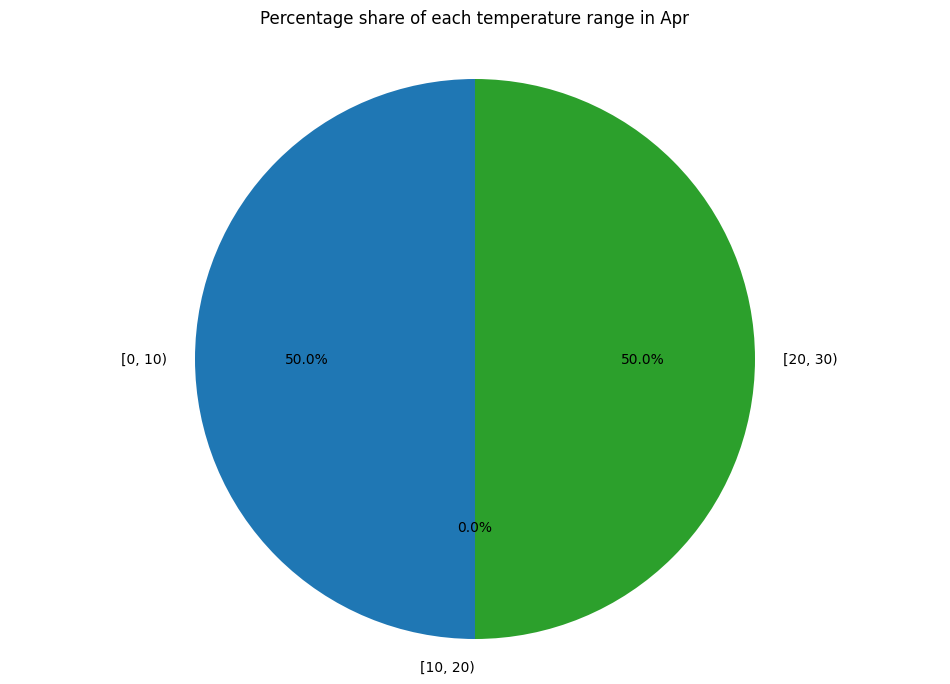

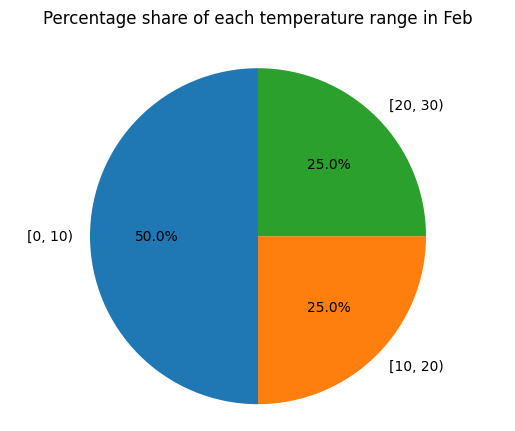

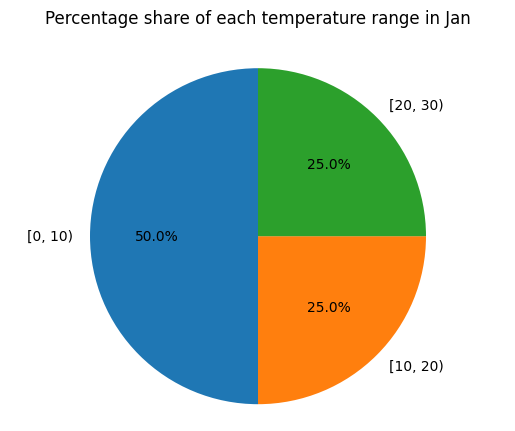

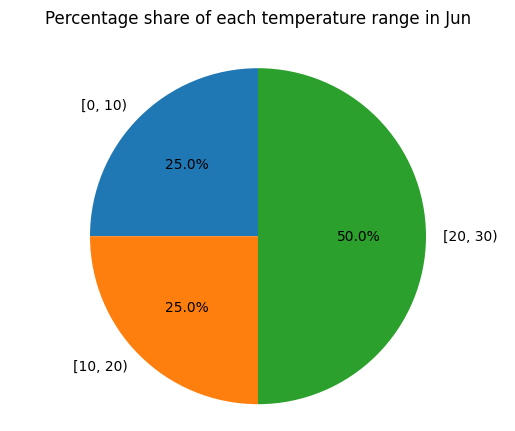

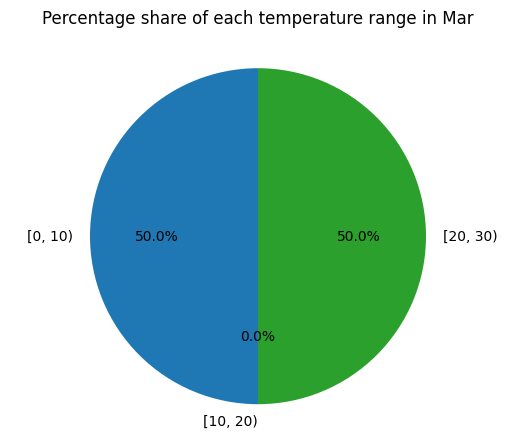

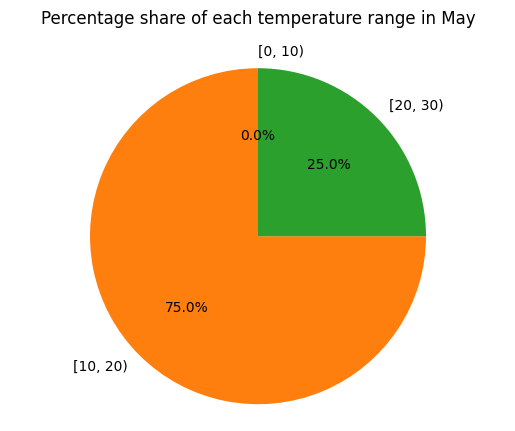

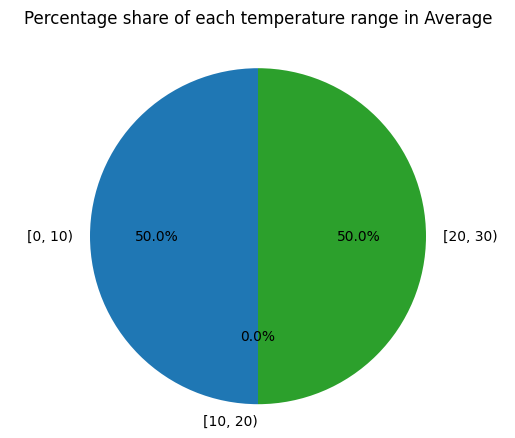

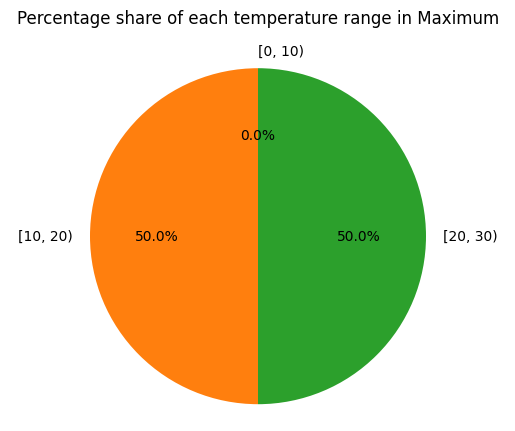

In [ ]:
bins = [0, 10, 20, 30]
temperature_counts = {}
for column in df.columns[1:]:
    temperature_counts[column] = pd.cut(df[column], bins=bins, right=False).value_counts(sort=False)

# Calculate the total counts for each range
total_counts = {}
for key in temperature_counts.keys():
    total_counts[key] = temperature_counts[key].sum()

# Calculate the percentages
percentages = {}
for key in temperature_counts.keys():
    percentages[key] = (temperature_counts[key] / total_counts[key]) * 100

# Plot the pie chart
plt.figure(figsize=(12, 8))
for key in percentages.keys():
    plt.pie(percentages[key], labels=percentages[key].index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Percentage share of each temperature range in {key}', pad=20)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()